<a href="https://colab.research.google.com/github/verryp/dts-deep-learning-project/blob/master/Final_Project_DTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential # Jenis Model
from tensorflow.keras.layers import Dense #Sebuah lapisan untuk MLP -> bisa berupa layer input,hidden, ataupun output
from tensorflow.keras.utils import to_categorical #Mengubah label 0-9 menjadi representasi yang bisa diproses oleh keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.examples.tutorials.mnist import input_data #Dataset fashion mnist dari keras

## Download Dataset

In [0]:
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data/fashion’: File exists
--2019-08-17 06:30:10--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.7
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.7|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  15.2MB/s    in 1.7s    

2019-08-17 06:30:12 (15.2 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-08-17 06:30:13--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazona

## Import Dataset

In [0]:
# Import Fashion MNIST
fashion_mnist = input_data.read_data_sets('data/fashion')

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


## Bentuk Dataset

In [87]:
# Shapes of training set
x_train, y_train = fashion_mnist.train.images, fashion_mnist.train.labels

print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Training set (labels) shape: {shape}".format(shape=y_train.shape))

# Shapes of test set
x_test, y_test = fashion_mnist.test.images, fashion_mnist.test.labels
print("\nTest set (images) shape: {shape}".format(shape=x_test.shape))
print("Test set (labels) shape: {shape}".format(shape=y_test.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000,)

Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000,)


## Akses data pada Dataset

Random 10 image dari data training : 


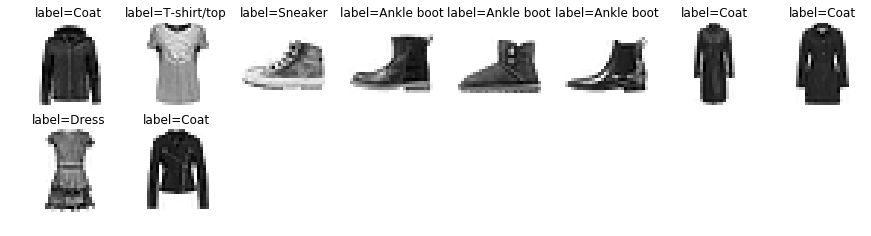

In [88]:
# Set label dalam bentuk huruf -> agar bisa dibaca dengan baik
class_names = {0:'T-shirt/top',
                  1:'Trouser',
                  2:'Pullover',
                  3:'Dress',
                  4:'Coat',
                  5:'Sandal',
                  6:'Shirt',
                  7:'Sneaker',
                  8:'Bag',
                  9:'Ankle boot'}

# proses menampilkan data dengan bantuan lib matplotlib
print("Random 10 image dari data training : ")
plt.figure(figsize=(15,10))
for i in range(10):  
    plt.subplot(5, 8, i+1)
    plt.imshow(x_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("label=%s" % class_names[y_train[i]],y=1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

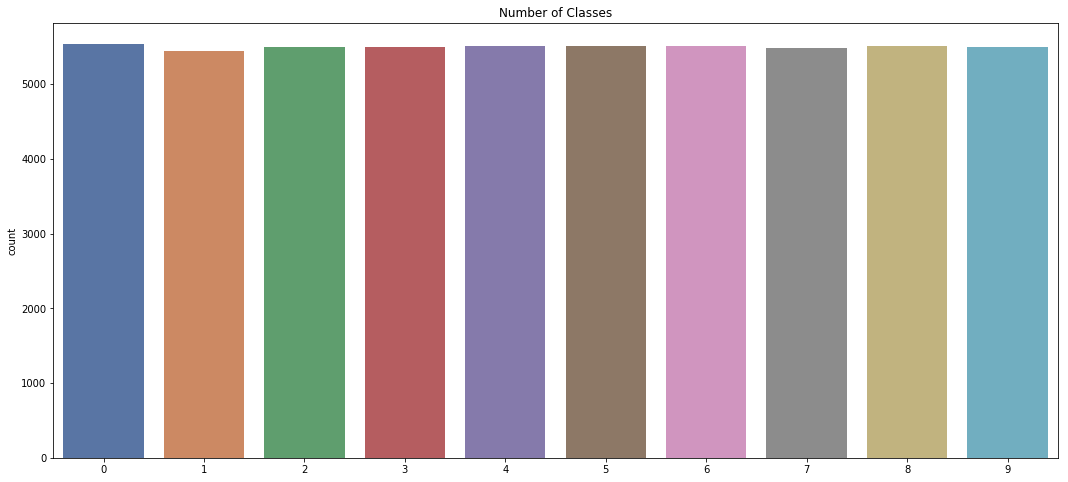

In [92]:
import seaborn as sns

plt.figure(figsize=(18, 8))
sns.countplot(y_train, palette="deep")
plt.title("Number of Classes")
plt.show()

In [0]:
# preprocesssing data

# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('x_train shape : ', x_train.shape)
print('Banyak gambar di x_train : ', x_train.shape[0])
print('Banyak gambar di x_test', x_test.shape[0])

x_train shape :  (55000, 28, 28, 1)
Banyak gambar di x_train :  55000
Banyak gambar di x_test 10000


In [0]:
input_shape = (28, 28, 1)
adam = Adam(lr=0.001)

# Membuat model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', strides=1, input_shape=input_shape))
# Conv2D
# - filters = jumlah node. mirip seperti Dense
# - kernel_size = jumlah node yang bergeser. 2 artinya matrik 2x2
# - strides = bergesernya pixel ke kanan sebanyak 1 kolom
# - padding = merupakan garis putus (sisa/tambahan pixel dari hasil stride) untuk membantu proses perhitungan
#       => value 'same' artinya padding akan diberikan sebagaimana hasil proses perhitungan sama dengan input 
#       => input 28x28x1 maka menjadi 28x28x64. 28x28 tidak berubah karena 'same'

model.add(MaxPooling2D(pool_size=2))
# MaxPooling2D
# - untuk memperkecil ukuran dari Conv2D dengan cara mengambil angka tersebar untuk setiap setingan pixel matrik dalam hal ini 2x2 dalam setiap proses
# - dapat mencegah overfitting

model.add(Flatten())
# Flatten
# - meratakan semua output dari layer sebelumnya sehingga bisa diproses menggunakan Dense
# - hasil output MaxPool adalah 14x14x64 dan flatten akan meratakan menjadi 12.544 sel
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                125450    
Total params: 125,770
Trainable params: 125,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# menggunakan TensorBoard
callbacks = TensorBoard(log_dir='./Graph')

# TRAINING

# Training data dengan 10 epochs dan menggunakan TensorBoard Callback
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=128)

# Menyimpan Weights
model.save_weights('weights.h5')


Train on 49500 samples, validate on 5500 samples
Epoch 1/10
49500/49500 [==============================] - 3s 64us/sample - loss: 1.8777 - acc: 0.4985 - val_loss: 1.2682 - val_acc: 0.6987
Epoch 2/10
49500/49500 [==============================] - 3s 60us/sample - loss: 1.0022 - acc: 0.7057 - val_loss: 0.8241 - val_acc: 0.7245
Epoch 3/10
49500/49500 [==============================] - 3s 60us/sample - loss: 0.7666 - acc: 0.7423 - val_loss: 0.6888 - val_acc: 0.7618
Epoch 4/10
49500/49500 [==============================] - 3s 60us/sample - loss: 0.6759 - acc: 0.7642 - val_loss: 0.6263 - val_acc: 0.7798
Epoch 5/10
49500/49500 [==============================] - 3s 58us/sample - loss: 0.6235 - acc: 0.7801 - val_loss: 0.5887 - val_acc: 0.7927
Epoch 6/10
49500/49500 [==============================] - 3s 58us/sample - loss: 0.5866 - acc: 0.7931 - val_loss: 0.5548 - val_acc: 0.8020
Epoch 7/10
49500/49500 [==============================] - 3s 59us/sample - loss: 0.5579 - acc: 0.8029 - val_loss: 0.5

Test Lost :  0.5174752257823944
Test Accurary :  0.8138


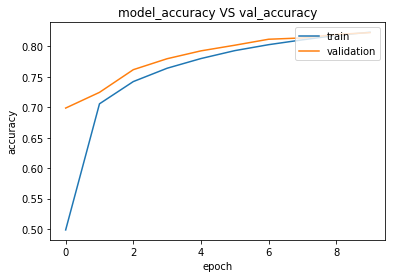

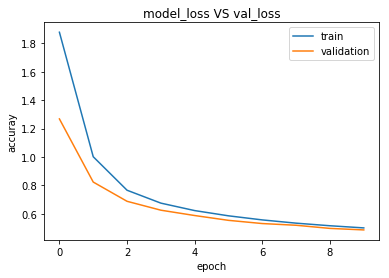

In [0]:
#PREDIKSI
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Lost : ', score[0] )
print('Test Accurary : ', score[1])


#EVALUATING - VISUALISASI HASIL
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy VS val_accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.savefig('acc_plot.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss VS val_loss')

plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
# ptl.savefig('acc_plot.png')
plt.show()

In [80]:
# # testing
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# total_test = len(x_test)
# correct_predic = 0

# y_true = []
# y_pred = []

# for i in range (total_test):
#   predict = model.predict(x_test[i])
#   print(predict)
  
#   label = y_test[i]
#   prediction = predict.argmax(axis=-1)
#   print('Original label : ' + str(label))
#   print('Original prediction : ' + str(prediction) + '\n')
  
#   y_true.append(label)
#   y_pred.append(prediction)
  
#   if prediction[0] == label:
#     correct_predic += 1
#     print('total correct prediction : ' + str(correct_predic) + '\n')
#     print('total incorrect prediction : ' + str(total_test - correct_predic) + '\n')
#     print('accuracy : ', accuracy_score(y_true, y_pred))
#     print('classification report : \n', classification_report(y_true, y_pred))
#     print('confusion matrix : ', confusion_matrix(y_true, y_pred))
    

IndentationError: ignored

## Sumber

1.   https://github.com/zalandoresearch/fashion-mnist
2.   https://medium.com/tensorist/classifying-fashion-articles-using-tensorflow-fashion-mnist-f22e8a04728a

